<a href="https://colab.research.google.com/github/bsenst/UWWi_DataDive_Dec22/blob/main/external_datasets/news/clients_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/building_client_persona/client_data_with_ADI_SVI_Indices.csv.zip

--2022-12-03 22:19:28--  https://github.com/bsenst/UWWi_DataDive_Dec22/raw/main/building_client_persona/client_data_with_ADI_SVI_Indices.csv.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bsenst/UWWi_DataDive_Dec22/main/building_client_persona/client_data_with_ADI_SVI_Indices.csv.zip [following]
--2022-12-03 22:19:28--  https://raw.githubusercontent.com/bsenst/UWWi_DataDive_Dec22/main/building_client_persona/client_data_with_ADI_SVI_Indices.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23275537 (22M) [application/zip]
Saving to: ‘client_data_with_ADI_SVI_Indices.csv.zip’

clie

In [2]:
! unzip /content/client_data_with_ADI_SVI_Indices.csv.zip

Archive:  /content/client_data_with_ADI_SVI_Indices.csv.zip
  inflating: client_data_with_ADI_SVI_Indices.csv  


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

clients = pd.read_csv("/content/client_data_with_ADI_SVI_Indices.csv.zip")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796761 entries, 0 to 796760
Data columns (total 19 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Client_Id                                  796761 non-null  int64  
 1   Client_CreateStamp                         796761 non-null  object 
 2   Client_EditStamp                           796761 non-null  object 
 3   ClientOption_PreferredLanguageOfCaller     796761 non-null  object 
 4   ClientSystem_PreferredLanguageOther        431 non-null     object 
 5   ClientAddressus_ClientAddressus_city       795992 non-null  object 
 6   ClientAddressus_ClientAddressus_county     796761 non-null  object 
 7   ClientAddressus_ClientAddressus_state      796761 non-null  object 
 8   ClientAddressus_ClientAddressus_zip        756533 non-null  float64
 9   ClientCustom_AgeOfPersonNeedingAssistance  91447 non-null   float64
 10  ClientCu

# Almost 800k Clients

In [8]:
len(clients.Client_Id.unique())

796761

# Available Client Features

In [11]:
clients.isna().sum()

Client_Id                                         0
Client_CreateStamp                                0
Client_EditStamp                                  0
ClientOption_PreferredLanguageOfCaller            0
ClientSystem_PreferredLanguageOther          796330
ClientAddressus_ClientAddressus_city            769
ClientAddressus_ClientAddressus_county            0
ClientAddressus_ClientAddressus_state             0
ClientAddressus_ClientAddressus_zip           40228
ClientCustom_AgeOfPersonNeedingAssistance    705314
ClientCustom_EthnicityOther                  796574
ClientOption_GenderOptionId                       0
ClientOption_VeteranStatusOptionlist              0
ADI_STATERANK                                329829
RPL_THEMES                                    17536
RPL_THEME1                                    17536
RPL_THEME2                                    17536
RPL_THEME3                                    17536
RPL_THEME4                                    17536
dtype: int64

# twice as many women as men

In [56]:

for k, v in clients.ClientOption_GenderOptionId.value_counts().items():
  if k == "[]":
    k = "Not answered"
  else:
    k = k.split("'")[1]
  print(k.ljust(14), v)

Not answered   549757
Female         166417
Male           79077
Unknown        1227
Transgender    200
Refused        47
Other          27
DO NOT USE - Transgendered Female to Male 9


# Clients almost equally distrib regarding Area Deprivation Index ADI

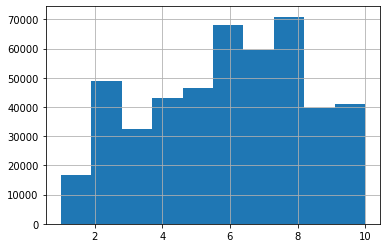

In [18]:
clients.ADI_STATERANK.hist()
# seems like clients living in areas with higher standard of living are also calling UWWi ?
# interpretation of ADI required

# Veterans

In [20]:
clients.ClientOption_VeteranStatusOptionlist.value_counts()

[]                      672889
['No']                   91217
['N/A']                  27131
['Yes']                   5317
['Yes', 'No']              100
['No', 'N/A']               97
['Yes', 'N/A']               7
['Yes', 'No', 'N/A']         3
Name: ClientOption_VeteranStatusOptionlist, dtype: int64

# Preferred Languages

In [21]:
clients.ClientOption_PreferredLanguageOfCaller.value_counts()

[]                            671829
['English']                   114121
['Spanish']                     7961
['Undetermined']                1286
['Declined']                     567
['Other']                        545
['American Sign Language']       174
['Hmong']                         91
['Chinese']                       52
['French']                        34
['Vietnamese']                    31
['Russian']                       20
['German']                        20
['Korean']                        15
['Italian']                       10
['Tagalog']                        5
Name: ClientOption_PreferredLanguageOfCaller, dtype: int64

## non english speakers with lower ADI

In [26]:
print(clients[clients.ClientOption_PreferredLanguageOfCaller=="['English']"].ADI_STATERANK.mean())
print(clients[clients.ClientOption_PreferredLanguageOfCaller=="['Spanish']"].ADI_STATERANK.mean())
print(clients[clients.ClientOption_PreferredLanguageOfCaller!="['English']"].ADI_STATERANK.mean())


6.838418515905455
6.376187202764509
5.742406586030799
